<a href="https://colab.research.google.com/github/mostafamotlk/stock-dashboard-assignment/blob/main/ChicagoPublicSchools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-sql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


In [2]:
%load_ext sql


In [3]:
%sql sqlite:///FinalDB.db


In [4]:
import pandas as pd
import sqlite3


In [5]:
from google.colab import files
uploaded = files.upload()


Saving ChicagoPublicSchools.csv to ChicagoPublicSchools.csv


In [6]:
df = pd.read_csv('ChicagoPublicSchools.csv')


In [7]:
df

School_ID                                     NAME_OF_SCHOOL  \
0       610038                  Abraham Lincoln Elementary School   
1       610281  Adam Clayton Powell Paideia Community Academy ...   
2       610185                Adlai E Stevenson Elementary School   
3       609993                    Agustin Lara Elementary Academy   
4       610513                      Air Force Academy High School   
..         ...                                                ...   
561     610172                William T Sherman Elementary School   
562     609844                 William W Carter Elementary School   
563     610088                Wolfgang A Mozart Elementary School   
564     609977               Woodlawn Community Elementary School   
565     610392                 World Language Academy High School   

    Elementary, Middle, or High School         Street_Address     City State  \
0                                   ES        615 W Kemper Pl  Chicago    IL   
1                                   ES  7511 S South Shore Dr  Chicago    IL   
2                                   ES     8010 S Kostner Ave  Chicago    IL   
3                                   ES     4619 S Wolcott Ave  Chicago    IL   
4                                   HS        3630 S Wells St  Chicago    IL   
..                                 ...                    ...      ...   ...   
561                                 ES         1000 W 52nd St  Chicago    IL   
562                                 ES    5740 S Michigan Ave  Chicago    IL   
563                                 ES      2200 N Hamlin Ave  Chicago    IL   
564                                 ES     6657 S Kimbark Ave  Chicago    IL   
565                                 HS     3120 S Kostner Ave  Chicago    IL   

     ZIP_Code    Phone_Number  \
0       60614  (773) 534-5720   
1       60649  (773) 535-6650   
2       60652  (773) 535-2280   
3       60609  (773) 535-4389   
4       60609  (773) 535-1590   
..        ...             ...   
561     60609  (773) 535-1757   
562     60637  (773) 535-0860   
563     60647  (773) 534-4160   
564     60637  (773) 535-0801   
565     60623  (773) 535-4334   

                                                  Link  \
0    http://schoolreports.cps.edu/SchoolProgressRep...   
1    http://schoolreports.cps.edu/SchoolProgressRep...   
2    http://schoolreports.cps.edu/SchoolProgressRep...   
3    http://schoolreports.cps.edu/SchoolProgressRep...   
4    http://schoolreports.cps.edu/SchoolProgressRep...   
..                                                 ...   
561  http://schoolreports.cps.edu/SchoolProgressRep...   
562  http://schoolreports.cps.edu/SchoolProgressRep...   
563  http://schoolreports.cps.edu/SchoolProgressRep...   
564  http://schoolreports.cps.edu/SchoolProgressRep...   
565  http://schoolreports.cps.edu/SchoolProgressRep...   

                        Network_Manager  ... Freshman_on_Track_Rate__  \
0          Fullerton Elementary Network  ...                      NDA   
1             Skyway Elementary Network  ...                      NDA   
2             Midway Elementary Network  ...                      NDA   
3           Pershing Elementary Network  ...                      NDA   
4    Southwest Side High School Network  ...                     91.8   
..                                  ...  ...                      ...   
561                        AUSL Schools  ...                      NDA   
562     Burnham Park Elementary Network  ...                      NDA   
563        Fullerton Elementary Network  ...                      NDA   
564     Burnham Park Elementary Network  ...                      NDA   
565       West Side High School Network  ...                       76   

    X_COORDINATE Y_COORDINATE   Latitude  Longitude COMMUNITY_AREA_NUMBER  \
0    1171699.458  1915829.428  41.924497 -87.644522                     7   
1    1196129.985  1856209.466  41.760324 -87.556736                    43   
2    1148427.

In [8]:
conn = sqlite3.connect('FinalDB.db')
df.to_sql('CHICAGO_PUBLIC_SCHOOLS', conn, if_exists='replace', index=False)
print("Table CHICAGO_PUBLIC_SCHOOLS created successfully!")

Table CHICAGO_PUBLIC_SCHOOLS created successfully!


In [9]:
%config SqlMagic.style = 'ChicagoPublicSchools'


In [10]:
%load_ext sql
%sql sqlite:///FinalDB.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [11]:
%config SqlMagic.style = 'PLAIN_COLUMNS'


In [12]:
# معلومات عن الأعمدة والأنواع
df.info()

# إحصائيات سريعة
df.describe()

# عدد الصفوف والأعمدة
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              565 non-null    object 
 9   Network_Manager      

(566, 78)

In [13]:
df['SAFETY_SCORE'].isnull().sum()


np.int64(53)

In [14]:
mean_value = df['SAFETY_SCORE'].mean()
df['SAFETY_SCORE'].fillna(mean_value, inplace=True)


/tmp/ipython-input-3637003381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SAFETY_SCORE'].fillna(mean_value, inplace=True)


In [15]:
df['SAFETY_SCORE'].isnull().sum()


np.int64(0)

In [16]:
null_columns = df.columns[df.isnull().any()]
null_columns


Index(['Link', 'Environment_Score', 'Instruction_Score',
       'AVERAGE_STUDENT_ATTENDANCE', 'ISAT_Exceeding_Math__',
       'ISAT_Exceeding_Reading__', 'ISAT_Value_Add_Math',
       'ISAT_Value_Add_Read'],
      dtype='object')

In [17]:
df[df.columns[df.isnull().any()]].isnull().sum()


Link                           1
Environment_Score             53
Instruction_Score             53
AVERAGE_STUDENT_ATTENDANCE     1
ISAT_Exceeding_Math__         90
ISAT_Exceeding_Reading__      90
ISAT_Value_Add_Math           98
ISAT_Value_Add_Read           98
dtype: int64

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

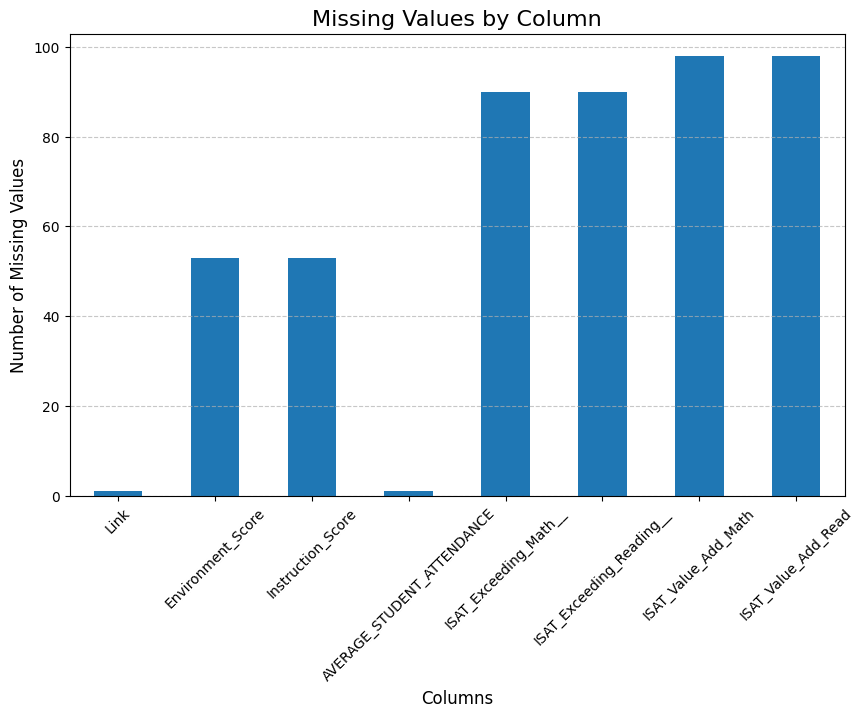

In [19]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

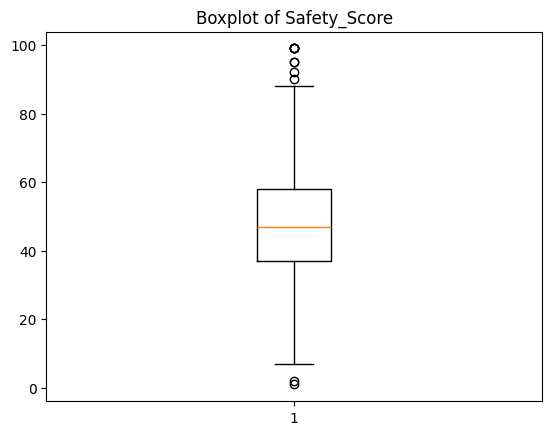

In [20]:
import matplotlib.pyplot as plt

plt.boxplot(df['Environment_Score'].dropna())
plt.title('Boxplot of Safety_Score')
plt.show()


In [21]:
df[df.columns[df.isnull().any()]].isnull().sum()


Link                           1
Environment_Score             53
Instruction_Score             53
AVERAGE_STUDENT_ATTENDANCE     1
ISAT_Exceeding_Math__         90
ISAT_Exceeding_Reading__      90
ISAT_Value_Add_Math           98
ISAT_Value_Add_Read           98
dtype: int64

In [22]:
df[null_columns].dtypes


Link                           object
Environment_Score             float64
Instruction_Score             float64
AVERAGE_STUDENT_ATTENDANCE     object
ISAT_Exceeding_Math__         float64
ISAT_Exceeding_Reading__      float64
ISAT_Value_Add_Math           float64
ISAT_Value_Add_Read           float64
dtype: object

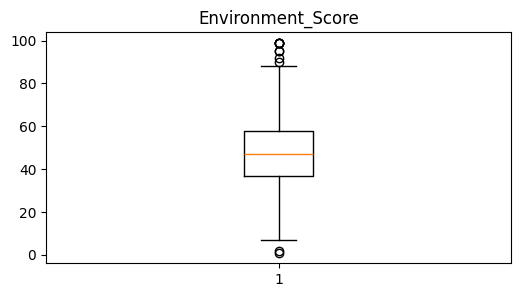

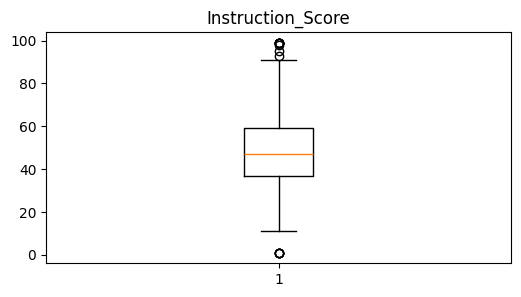

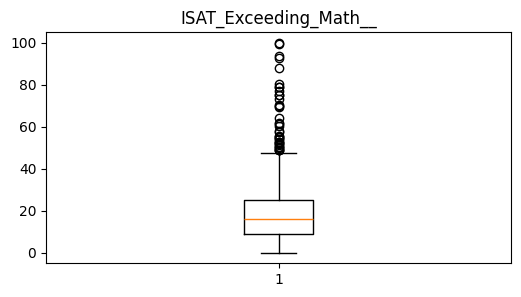

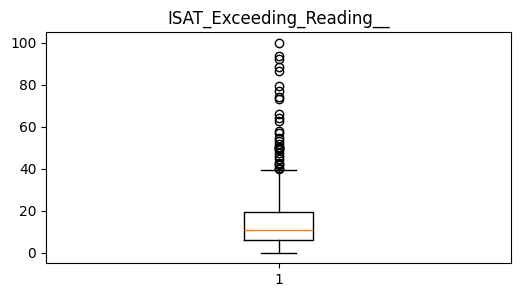

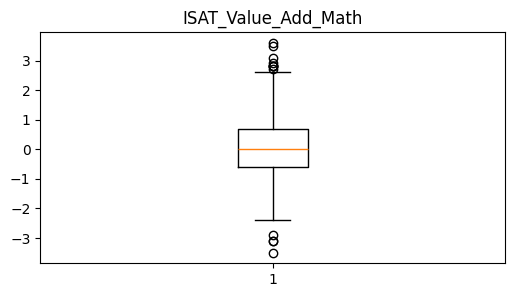

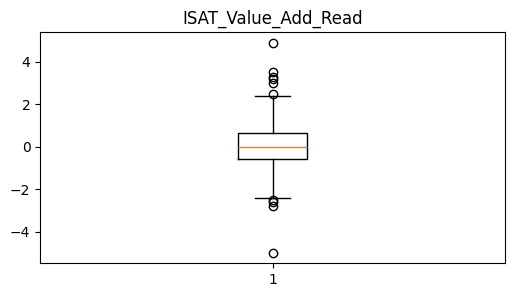

In [23]:
import matplotlib.pyplot as plt

for col in null_columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(6,3))
        plt.boxplot(df[col].dropna())
        plt.title(col)
        plt.show()


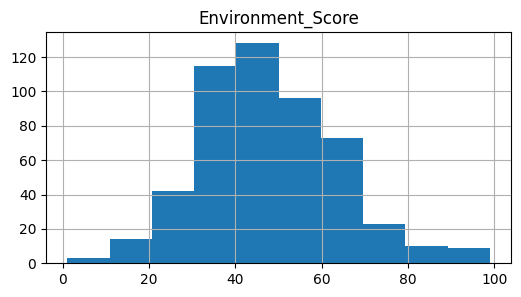

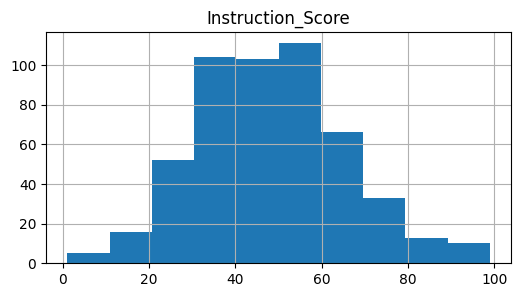

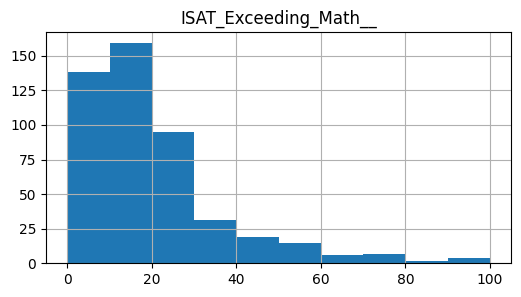

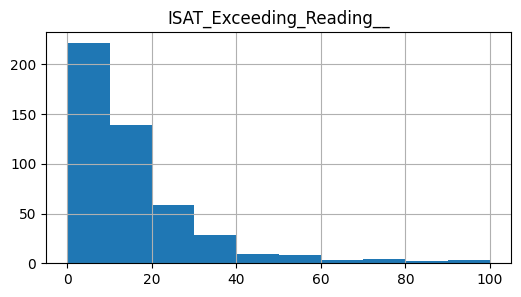

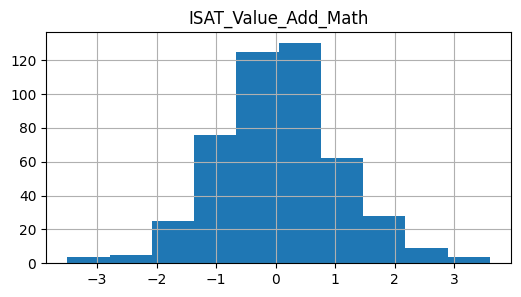

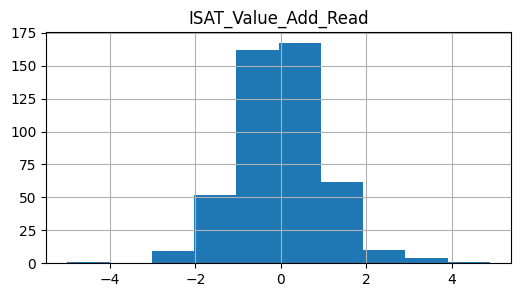

In [24]:
for col in null_columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(6,3))
        df[col].hist()
        plt.title(col)
        plt.show()


In [25]:
import pandas as pd

# الخطوة 1: تحديد الأعمدة اللي فيها قيم مفقودة
null_columns = df.columns[df.isnull().any()]

# الخطوة 2: تحليل كل عمود رقمي فيهم
for col in null_columns:
    if df[col].dtype in ['int64', 'float64']:  # الأعمدة الرقمية فقط
        skewness = df[col].dropna().skew()  # نحسب الميل (Skewness)
        print(f"\n📊 العمود: {col}")
        print(f"🔹 الميل (Skewness): {skewness:.2f}")

        # تفسير النتيجة
        if abs(skewness) < 0.5:
            print("✅ التوزيع طبيعي → استخدم **Mean**")
        elif abs(skewness) < 1:
            print("⚠️ ميل بسيط → ممكن Mean أو Median (يفضل Median لو فيه outliers)")
        else:
            print("🚨 التوزيع مائل جدًا → استخدم **Median**")
    else:
        print(f"\n📝 العمود: {col}")
        print("🔹 عمود نصي → استخدم **Mode**")



📝 العمود: Link
🔹 عمود نصي → استخدم **Mode**

📊 العمود: Environment_Score
🔹 الميل (Skewness): 0.42
✅ التوزيع طبيعي → استخدم **Mean**

📊 العمود: Instruction_Score
🔹 الميل (Skewness): 0.27
✅ التوزيع طبيعي → استخدم **Mean**

📝 العمود: AVERAGE_STUDENT_ATTENDANCE
🔹 عمود نصي → استخدم **Mode**

📊 العمود: ISAT_Exceeding_Math__
🔹 الميل (Skewness): 1.98
🚨 التوزيع مائل جدًا → استخدم **Median**

📊 العمود: ISAT_Exceeding_Reading__
🔹 الميل (Skewness): 2.52
🚨 التوزيع مائل جدًا → استخدم **Median**

📊 العمود: ISAT_Value_Add_Math
🔹 الميل (Skewness): 0.16
✅ التوزيع طبيعي → استخدم **Mean**

📊 العمود: ISAT_Value_Add_Read
🔹 الميل (Skewness): 0.17
✅ التوزيع طبيعي → استخدم **Mean**


In [26]:
mean_value = df['SAFETY_SCORE'].mean()
df['SAFETY_SCORE'].fillna(mean_value, inplace=True)


/tmp/ipython-input-3637003381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SAFETY_SCORE'].fillna(mean_value, inplace=True)


In [27]:
df[df.columns[df.isnull().any()]].isnull().sum()


Link                           1
Environment_Score             53
Instruction_Score             53
AVERAGE_STUDENT_ATTENDANCE     1
ISAT_Exceeding_Math__         90
ISAT_Exceeding_Reading__      90
ISAT_Value_Add_Math           98
ISAT_Value_Add_Read           98
dtype: int64

In [28]:
import pandas as pd

# الأعمدة اللي فيها قيم مفقودة
null_columns = df.columns[df.isnull().any()]

for col in null_columns:
    if df[col].dtype in ['int64', 'float64']:  # الأعمدة الرقمية فقط
        skewness = df[col].dropna().skew()

        if abs(skewness) < 0.5:
            fill_value = df[col].mean()
            method = "Mean"
        elif abs(skewness) < 1:
            fill_value = df[col].median()  # خيار Median أفضل لو فيه outliers
            method = "Median"
        else:
            fill_value = df[col].median()
            method = "Median"

        df[col].fillna(fill_value, inplace=True)
        print(f"✅ العمود '{col}' تم ملؤه باستخدام {method}")

    else:  # الأعمدة النصية
        fill_value = df[col].mode()[0]
        df[col].fillna(fill_value, inplace=True)
        print(f"✅ العمود '{col}' النصي تم ملؤه باستخدام Mode")

# التأكد إن مفيش قيم NULL بعد التعبئة
print("\n🎯 التأكد النهائي للقيم المفقودة:")
print(df.isnull().sum())


✅ العمود 'Link' النصي تم ملؤه باستخدام Mode
✅ العمود 'Environment_Score' تم ملؤه باستخدام Mean
✅ العمود 'Instruction_Score' تم ملؤه باستخدام Mean
✅ العمود 'AVERAGE_STUDENT_ATTENDANCE' النصي تم ملؤه باستخدام Mode
✅ العمود 'ISAT_Exceeding_Math__' تم ملؤه باستخدام Median
✅ العمود 'ISAT_Exceeding_Reading__' تم ملؤه باستخدام Median
✅ العمود 'ISAT_Value_Add_Math' تم ملؤه باستخدام Mean
✅ العمود 'ISAT_Value_Add_Read' تم ملؤه باستخدام Mean

🎯 التأكد النهائي للقيم المفقودة:
School_ID                             0
NAME_OF_SCHOOL                        0
Elementary, Middle, or High School    0
Street_Address                        0
City                                  0
                                     ..
COMMUNITY_AREA_NUMBER                 0
COMMUNITY_AREA_NAME                   0
Ward                                  0
Police_District                       0
Location                              0
Length: 78, dtype: int64


/tmp/ipython-input-4246516777.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
/tmp/ipython-input-4246516777.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [29]:
df[df.columns[df.isnull().any()]].isnull().sum()


Series([], dtype: float64)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ضبط شكل الرسومات
sns.set(style="whitegrid", palette="pastel", color_codes=True)


In [31]:
df.describe()


School_ID      ZIP_Code  SAFETY_SCORE  Environment_Score  \
count     566.000000    566.000000    566.000000         566.000000   
mean   609681.791519  60629.727915     49.504873          47.766082   
std      8831.060946     20.248024     19.144363          15.436305   
min    400018.000000  60605.000000      1.000000           1.000000   
25%    609873.250000  60618.000000     36.000000          37.000000   
50%    610052.500000  60625.000000     49.504873          47.766082   
75%    610212.750000  60639.000000     60.000000          57.000000   
max    610544.000000  60827.000000     99.000000          99.000000   

       Instruction_Score  Rate_of_Misconducts__per_100_students_  \
count         566.000000                              566.000000   
mean           48.288499                               21.085866   
std            16.580151                               27.543835   
min             1.000000                                0.000000   
25%            38.000000                                4.525000   
50%            48.288499                               12.250000   
75%            58.000000                               26.975000   
max            99.000000                              251.600000   

       ISAT_Exceeding_Math__  ISAT_Exceeding_Reading__  ISAT_Value_Add_Math  \
count             566.000000                566.000000            566.00000   
mean               19.663604                 14.916961              0.06859   
std                15.532637                 14.051037              0.94658   
min                 0.000000                  0.000000             -3.50000   
25%                10.100000                  6.925000             -0.40000   
50%                16.000000                 10.950000              0.06859   
75%                23.175000                 16.300000              0.50000   
max               100.000000                100.000000              3.60000   

       ISAT_Value_Add_Read  COLLEGE_ENROLLMENT  General_Services_Route  \
count           566.000000          566.000000              566.000000   
mean              0.022650          626.053004               39.084806   
std               0.947825          448.495105                6.165552   
min              -5.000000           21.000000               29.000000   
25%              -0.500000          342.250000               34.000000   
50%               0.022650          504.000000               39.000000   
75%               0.500000          790.500000               45.000000   
max               4.900000         4368.000000               49.000000   

       X_COORDINATE  Y_COORDINATE    Latitude   Longitude  \
count  5.660000e+02  5.660000e+02  566.000000  566.000000   
mean   1.163016e+06  1.885663e+06   41.841890  -87.677323   
std    1.605930e+04  3.285688e+04    0.090361    0.058390   
min    1.118114e+06  1.817242e+06   41.653674  -87.841052   
25%    1.152166e+06  1.860248e+06   41.771866  -87.717152   
50%    1.163553e+06  1.886889e+06   41.845521  -87.675878   
75%    1.174256e+06  1.911652e+06   41.913584  -87.636059   
max    1.202811e+06  1.950960e+06   42.021064  -87.533007   

       COMMUNITY_AREA_NUMBER        Ward  Police_District  
count             566.000000  566.000000       566.000000  
mean               37.706714   22.060071        11.710247  
std                21.584135   13.645574         6.688582  
min                 1.000000    1.000000         1.000000  
25%                23.000000   10.000000         7.000000  
50%                31.500000   21.000000        10.000000  
75%                58.000000   32.750000        17.000000  
max                77.000000   50.000000        25.000000

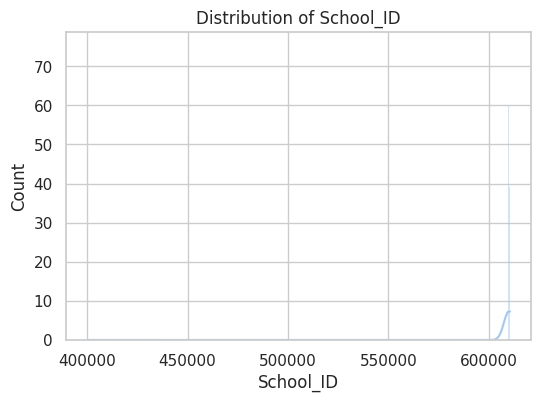

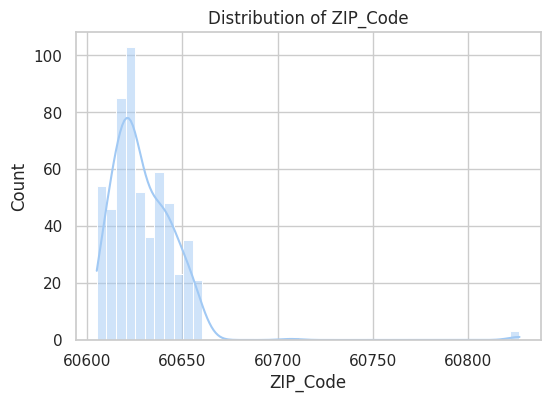

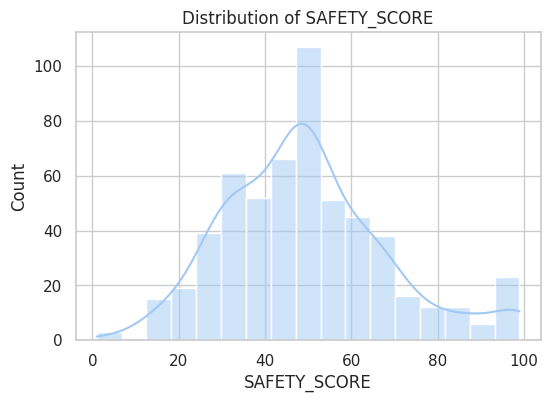

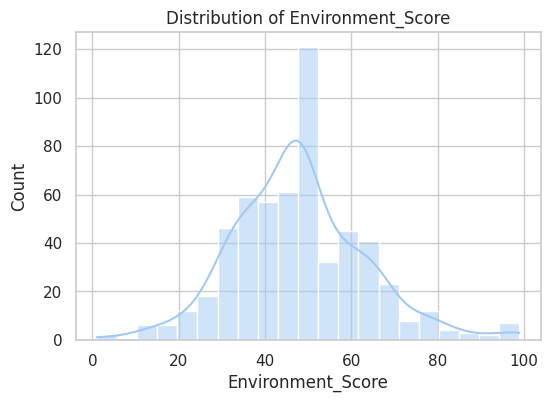

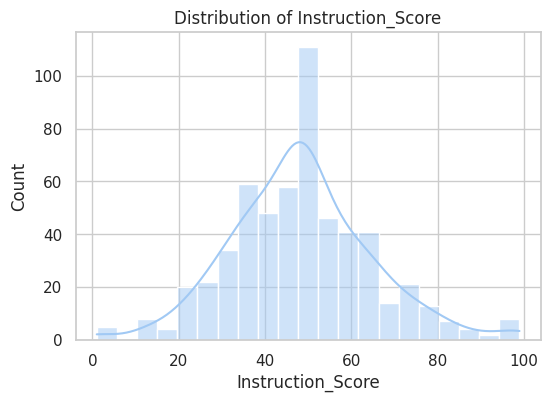

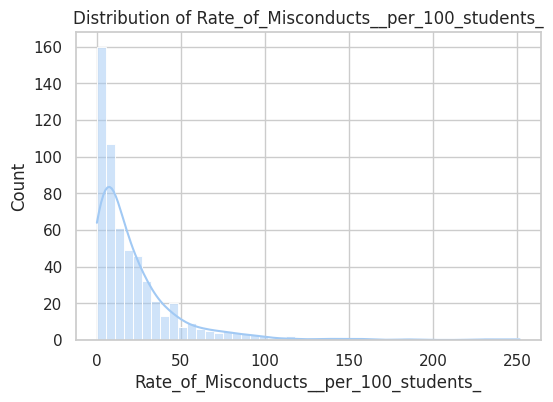

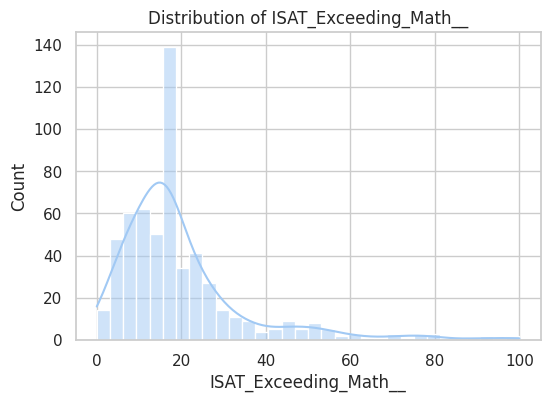

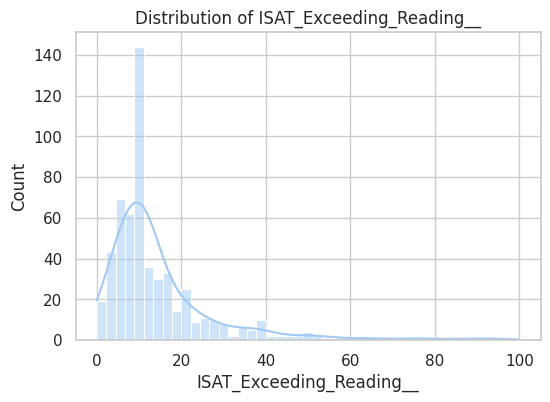

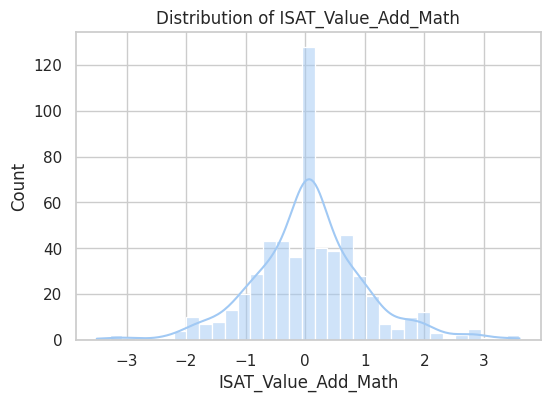

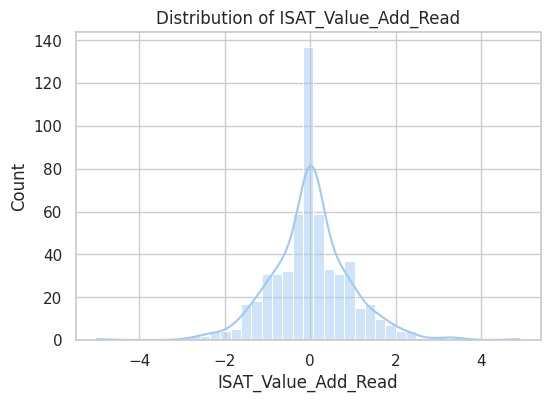

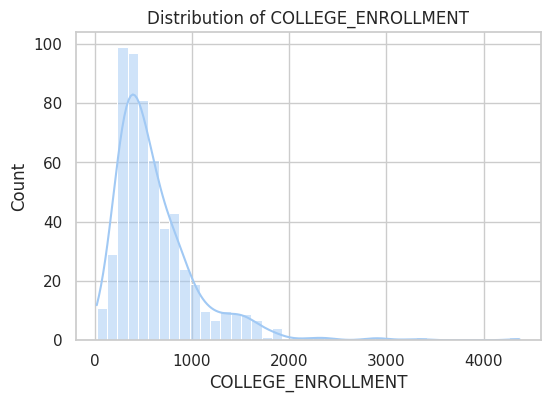

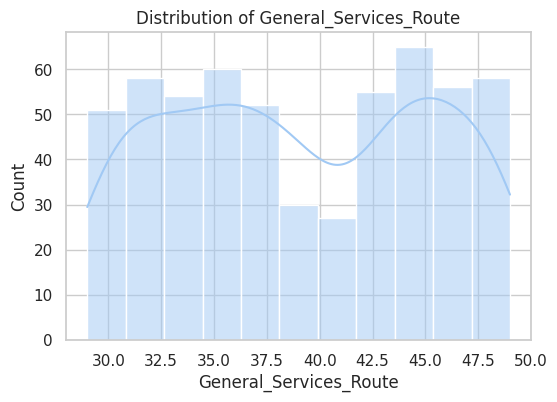

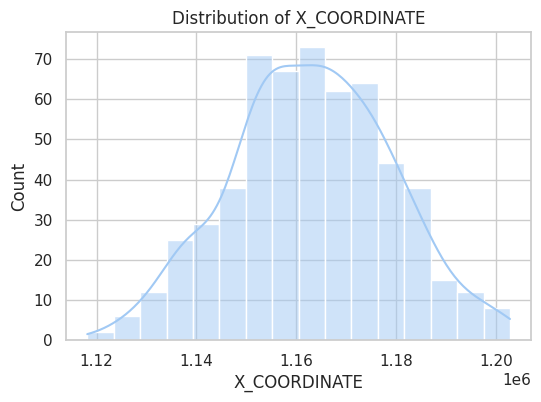

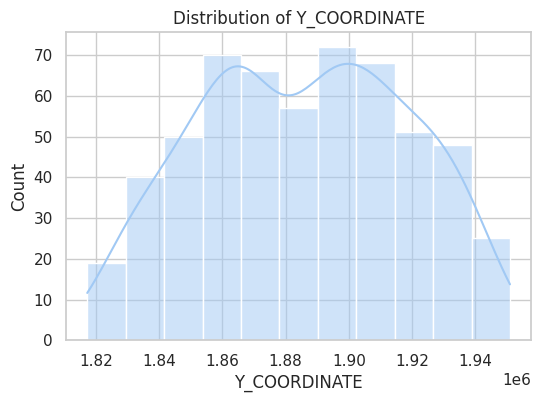

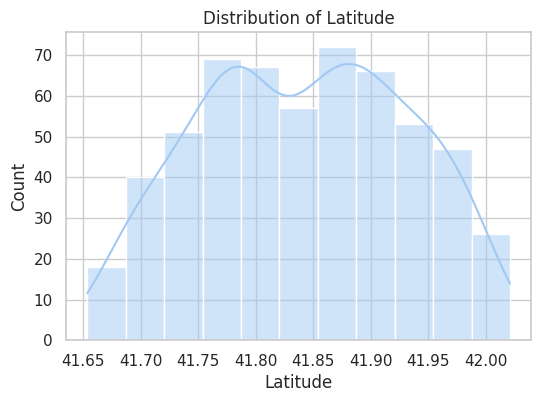

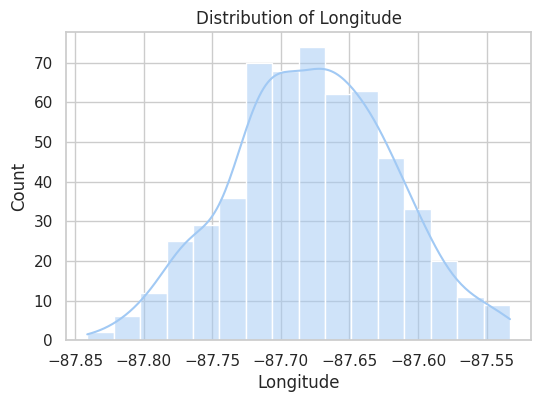

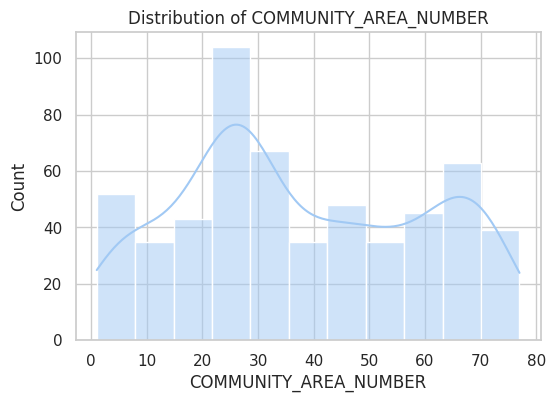

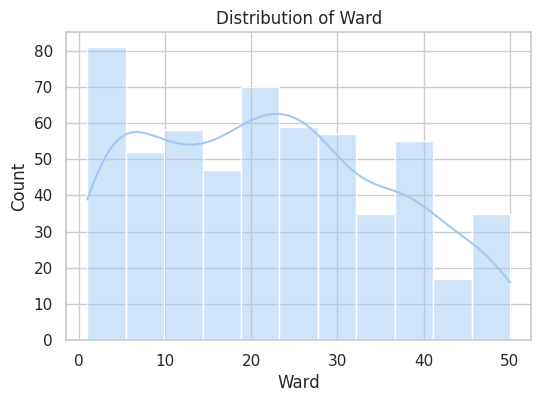

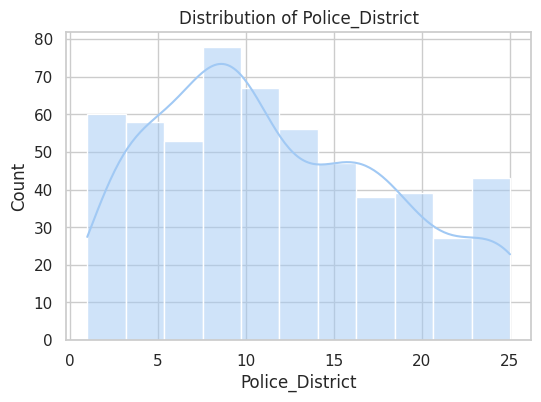

In [32]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


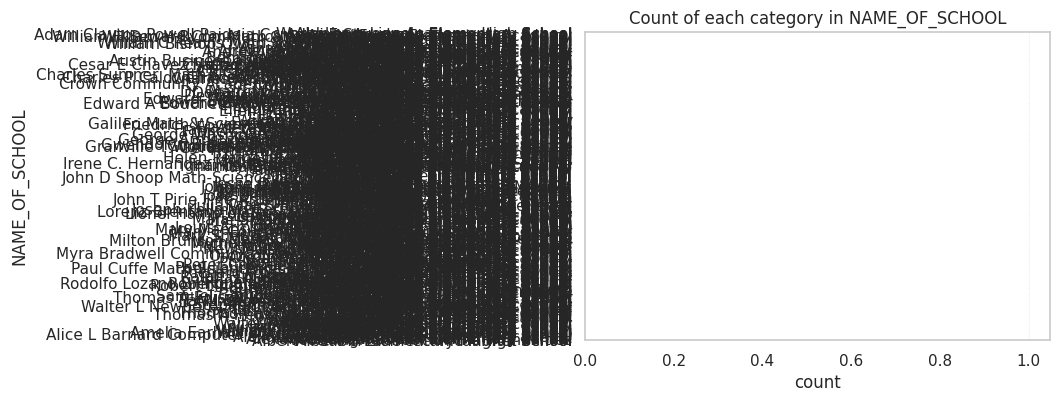

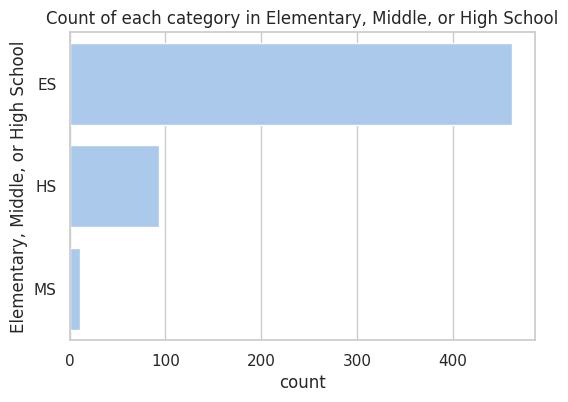

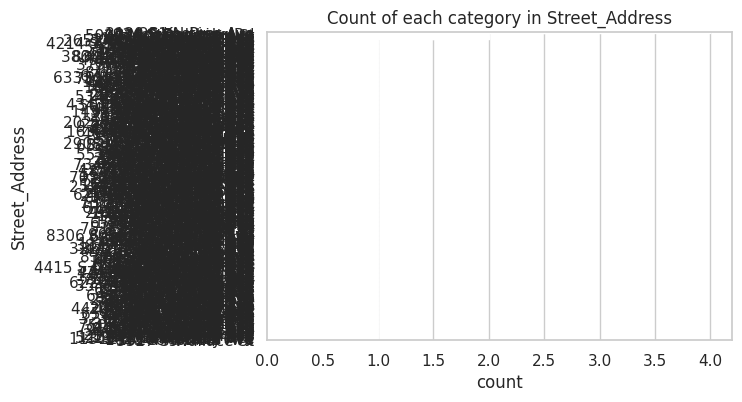

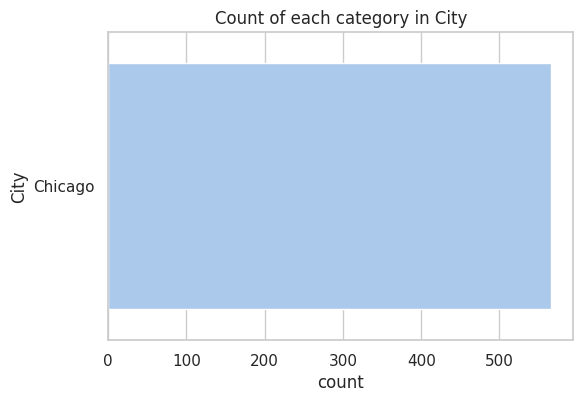

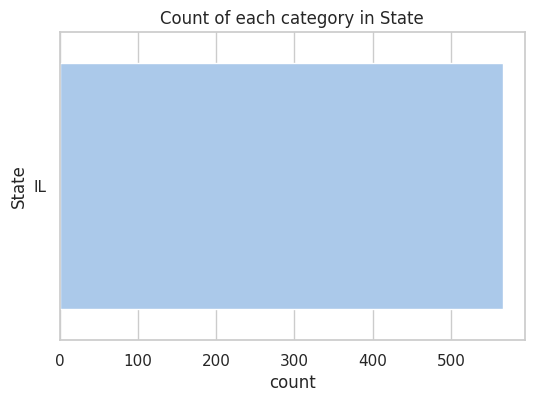

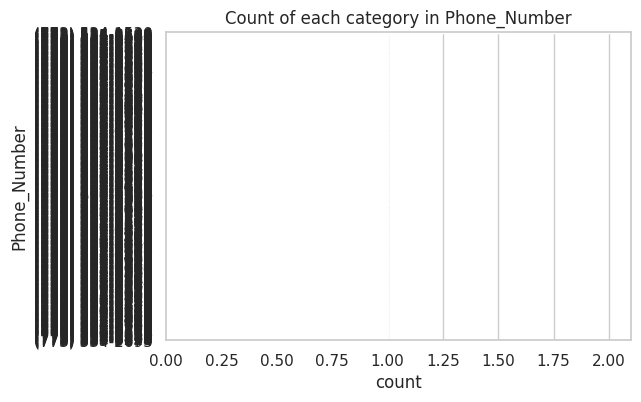

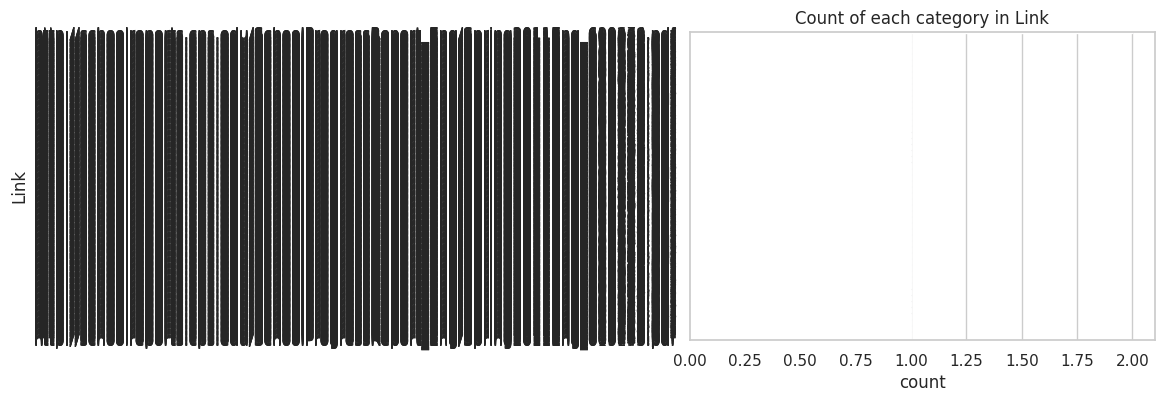

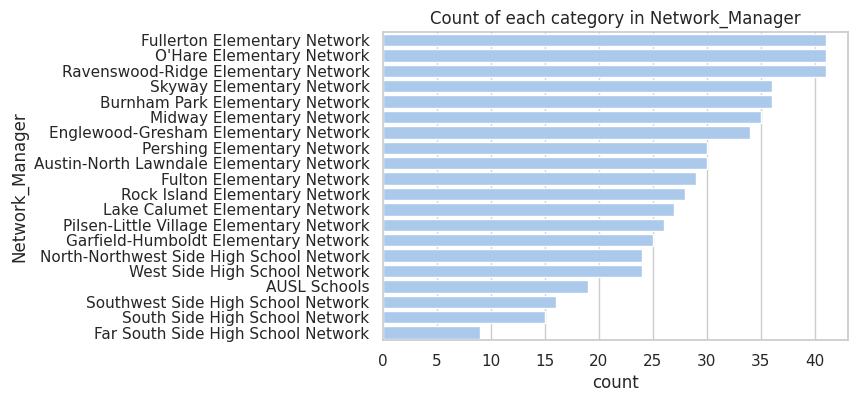

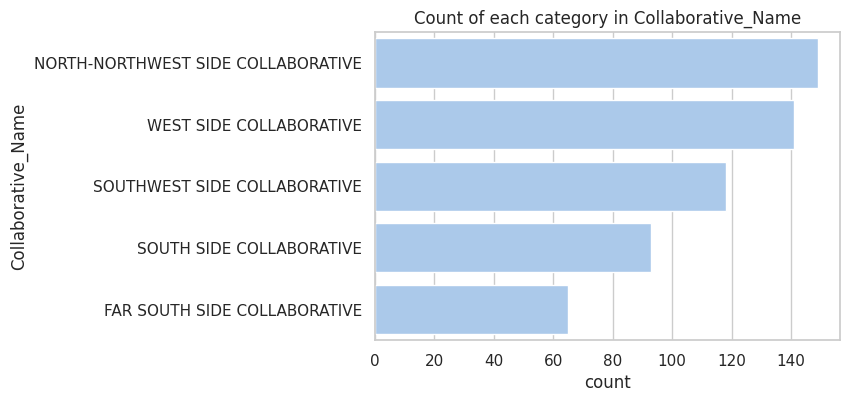

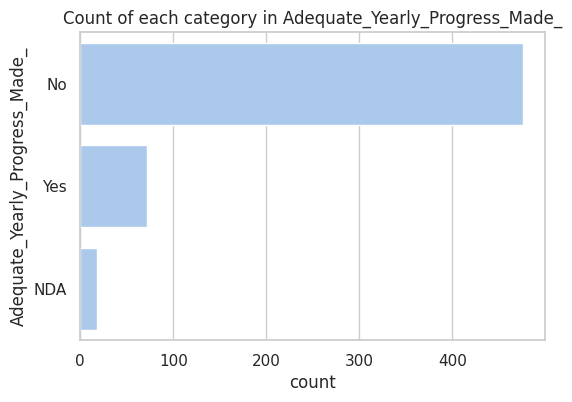

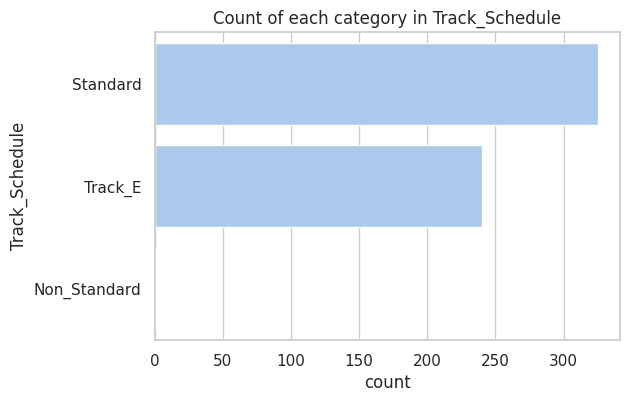

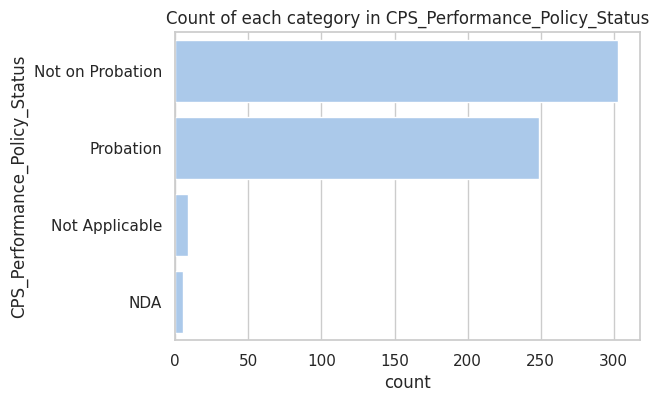

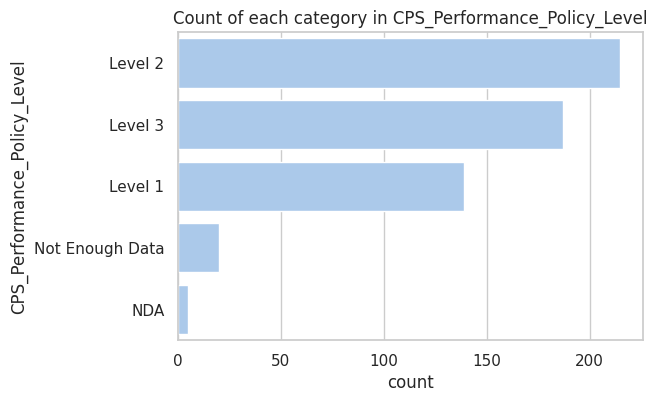

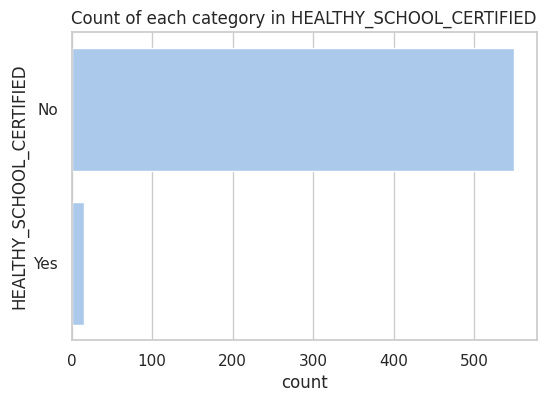

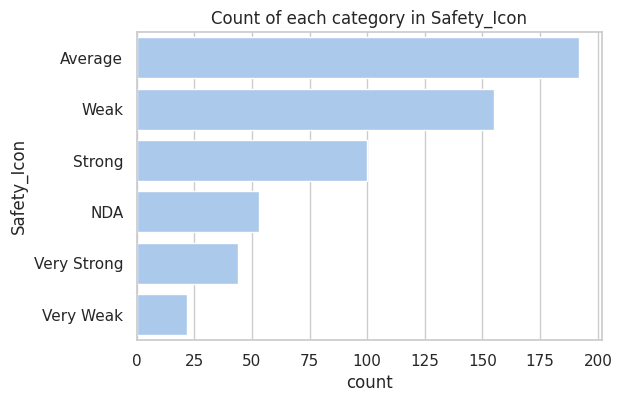

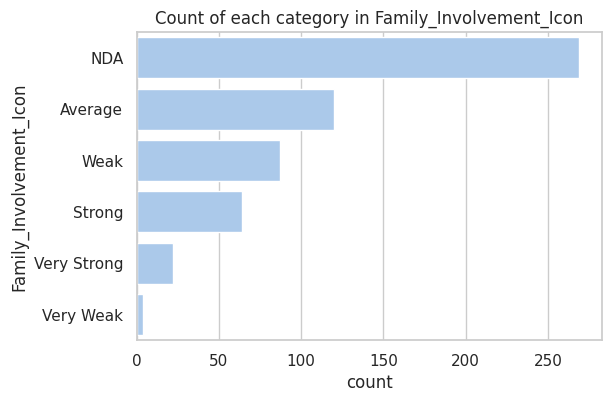

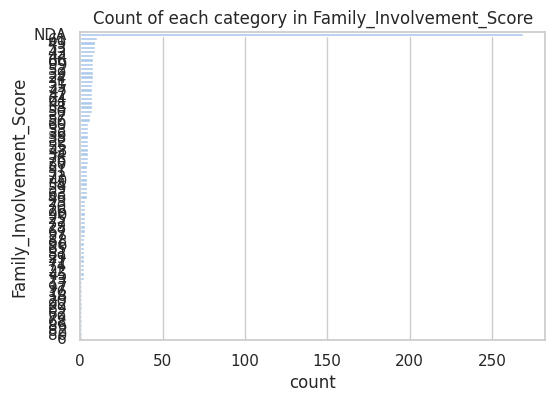

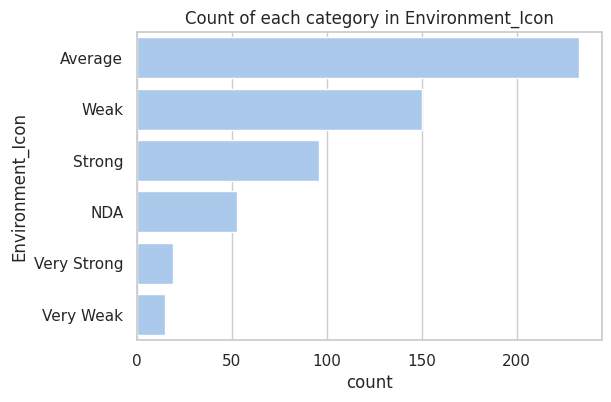

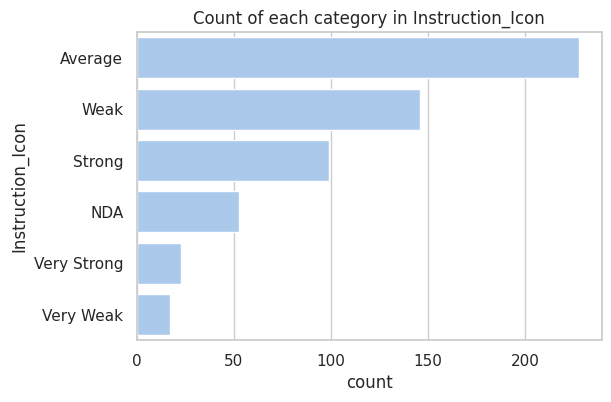

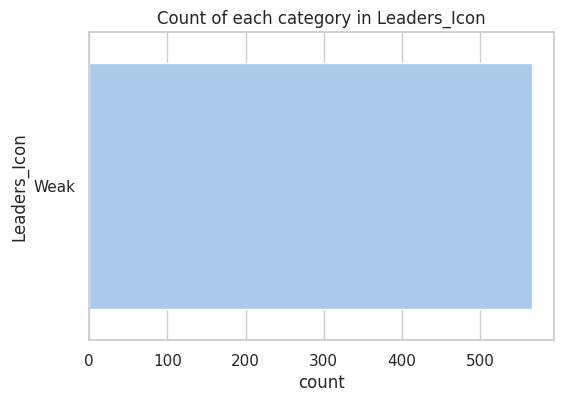

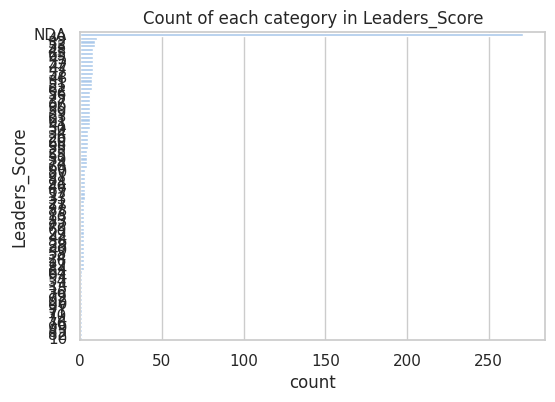

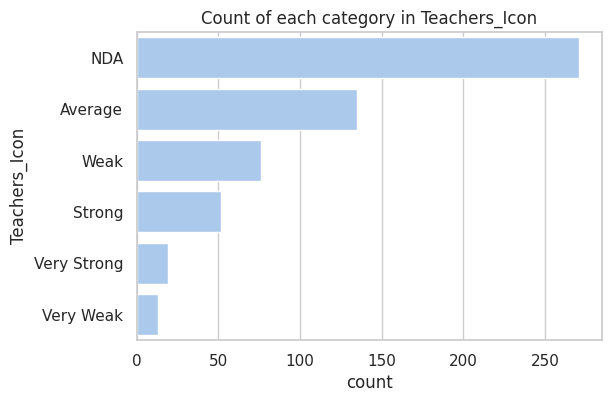

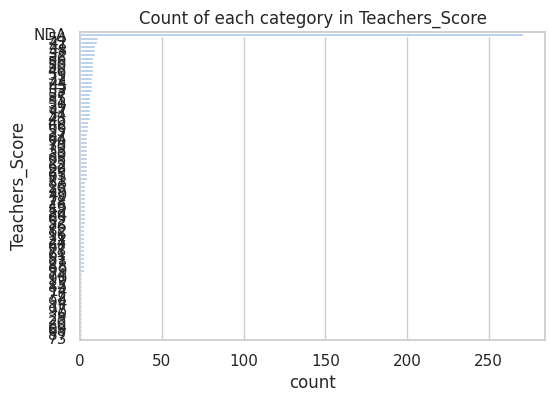

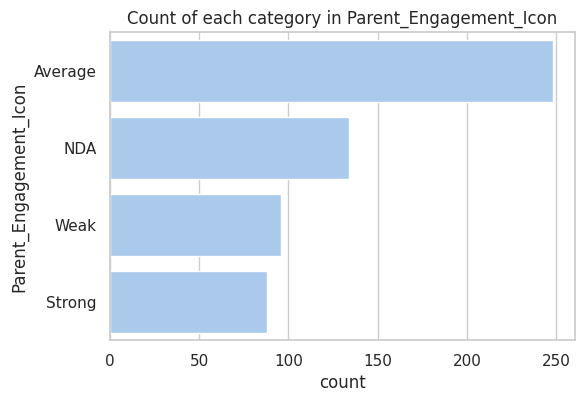

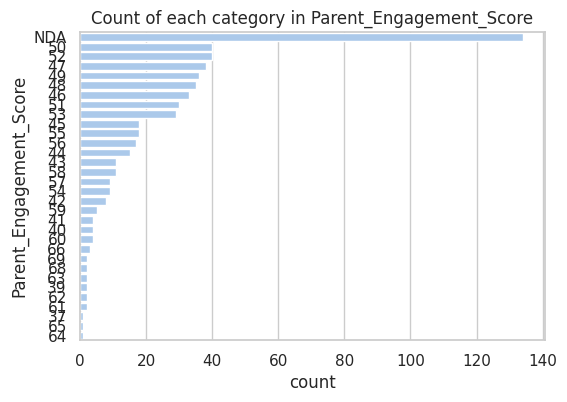

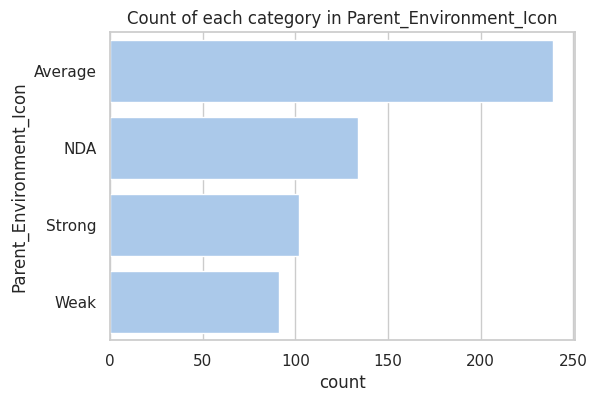

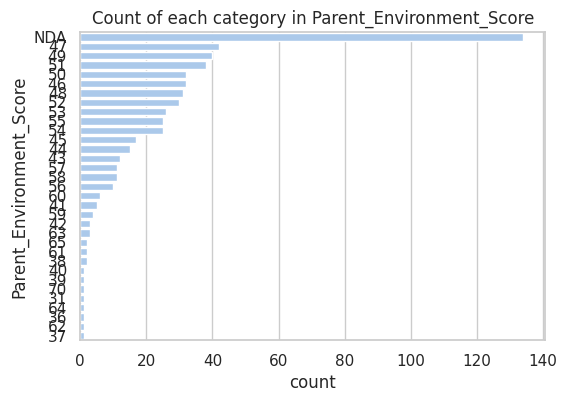

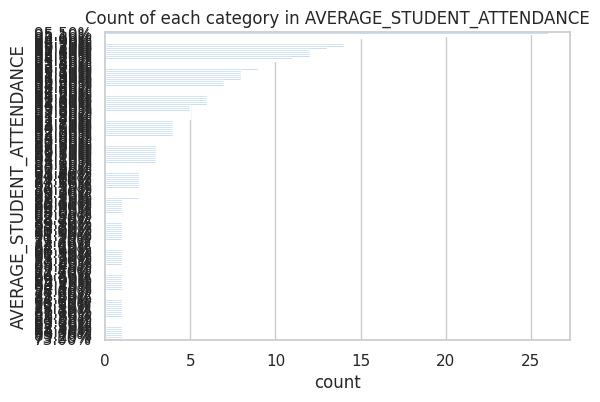

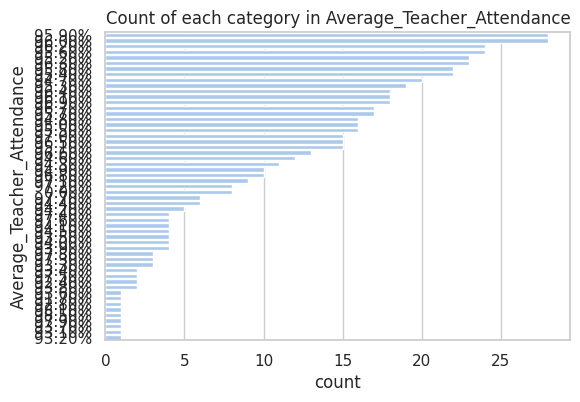

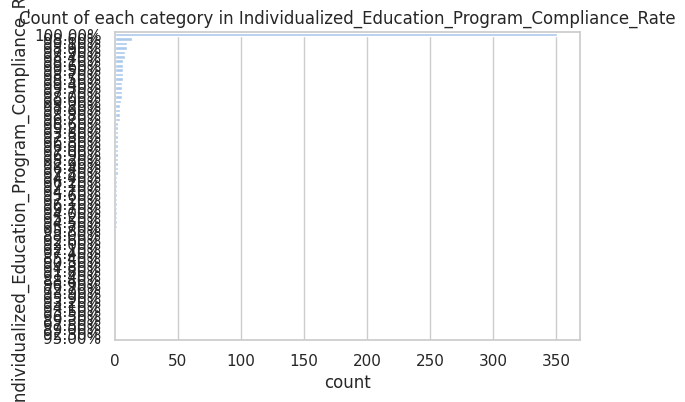

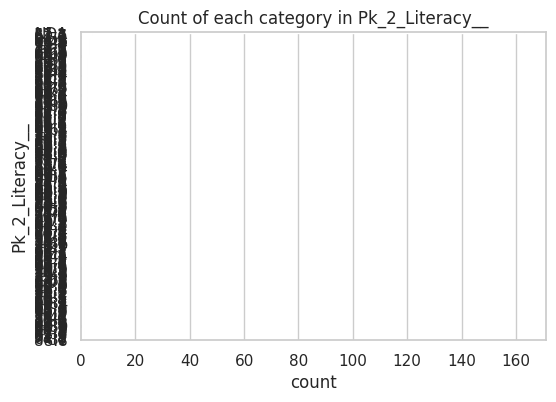

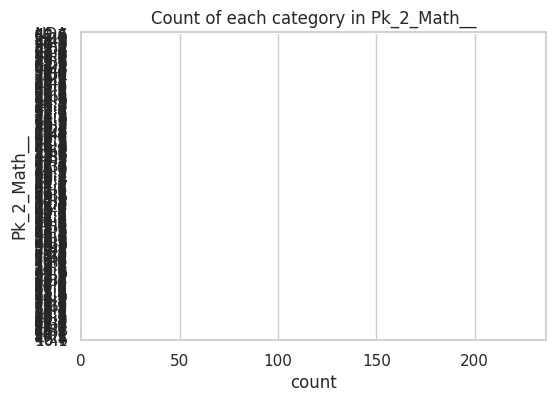

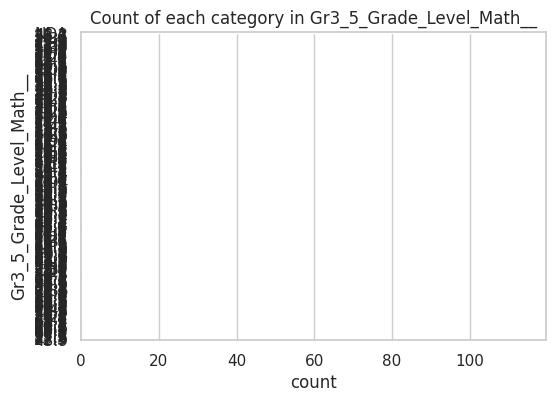

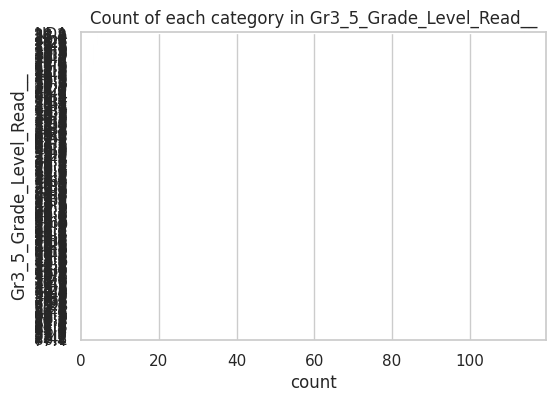

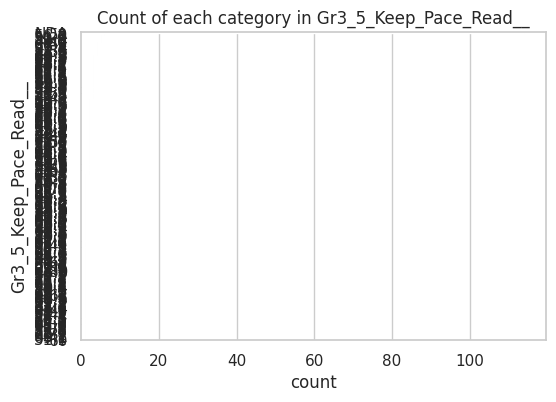

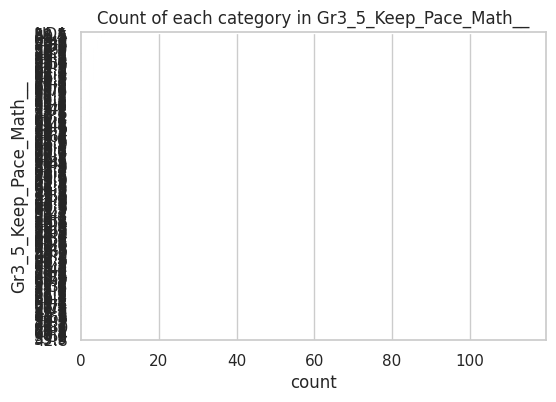

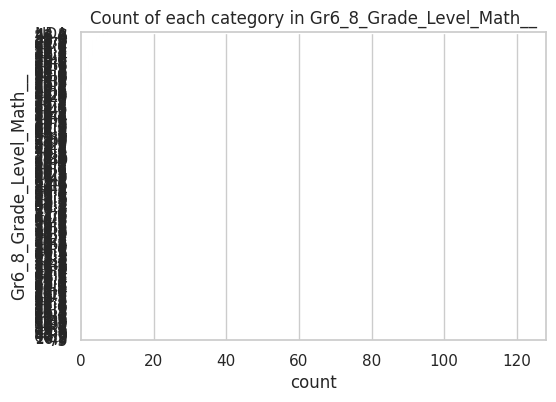

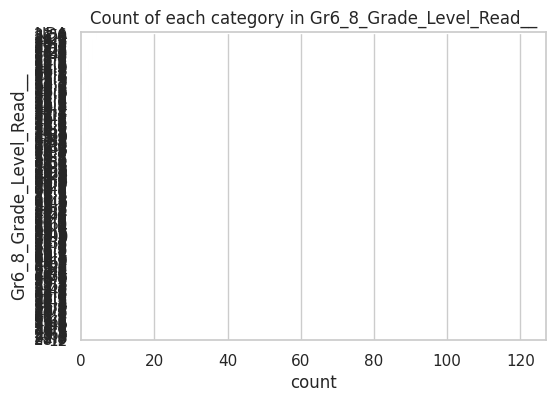

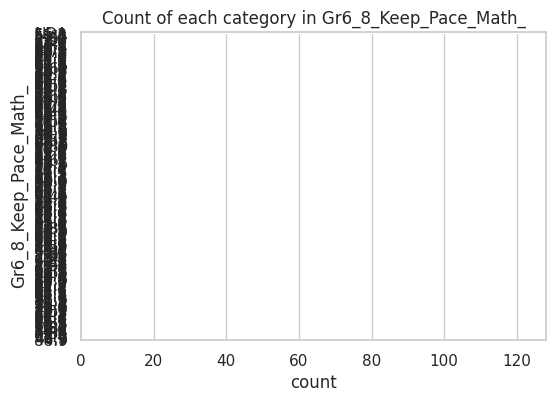

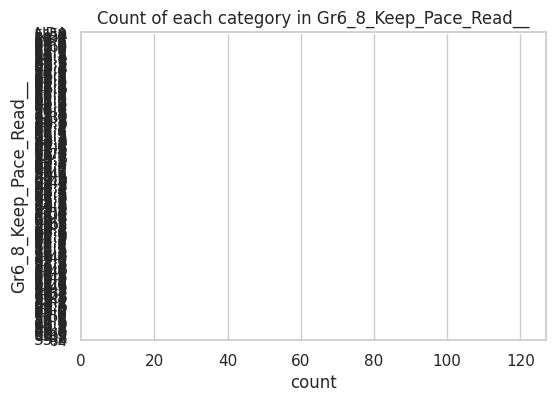

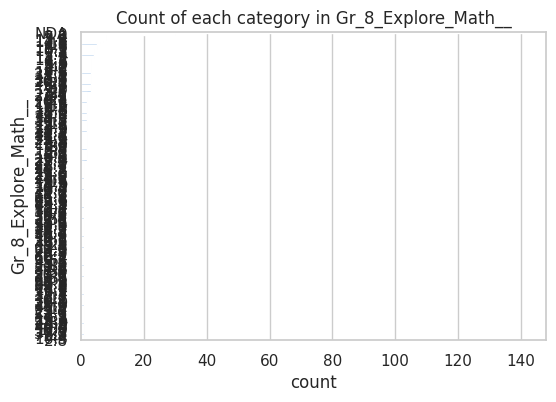

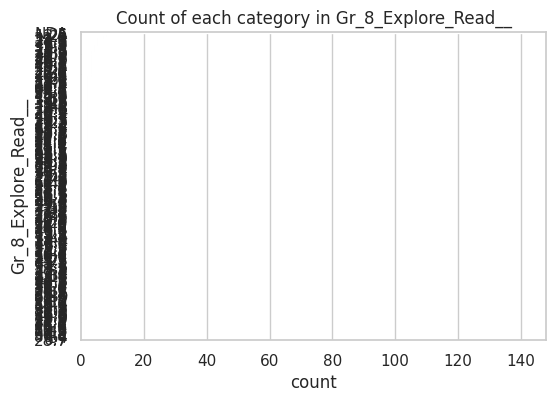

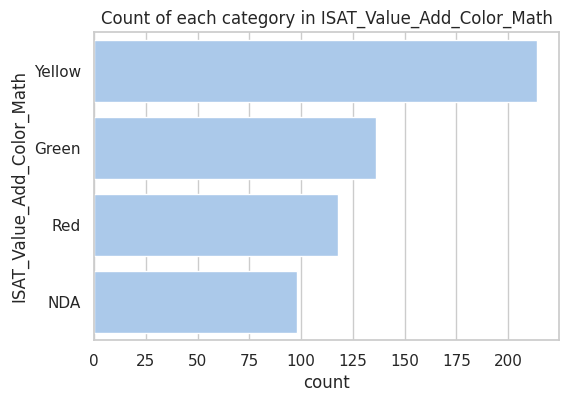

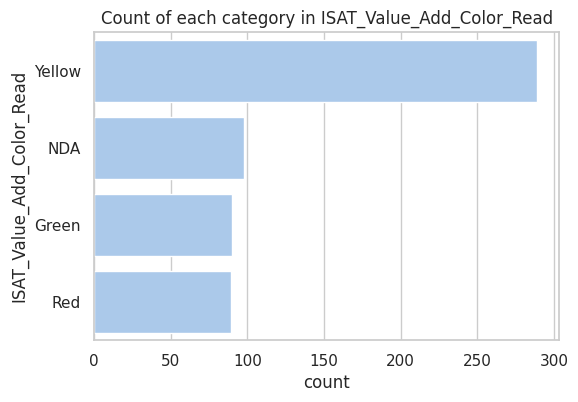

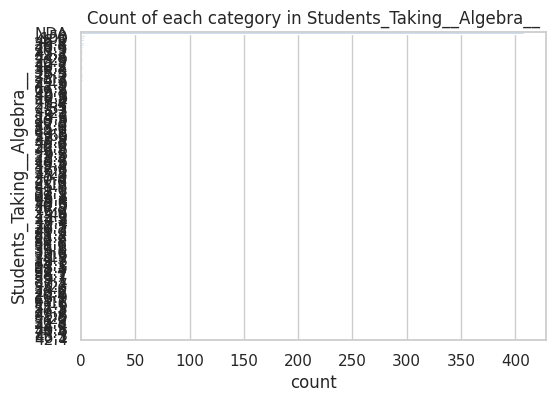

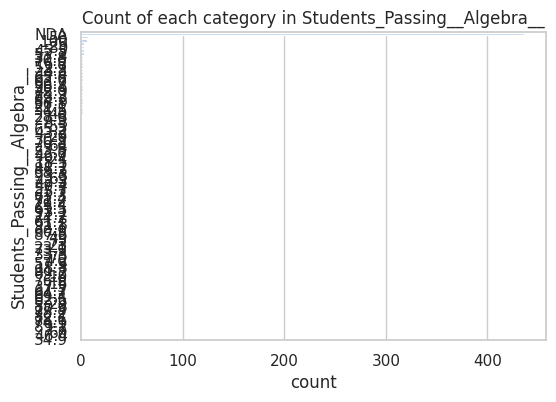

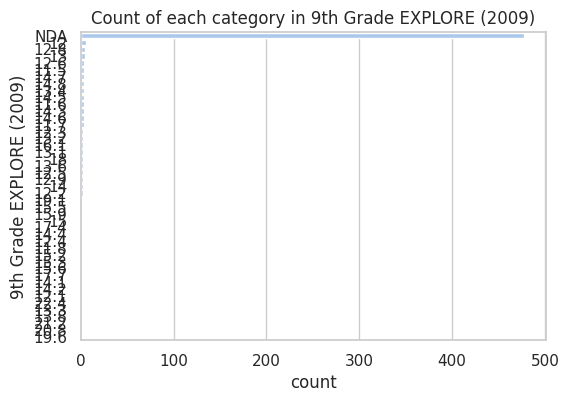

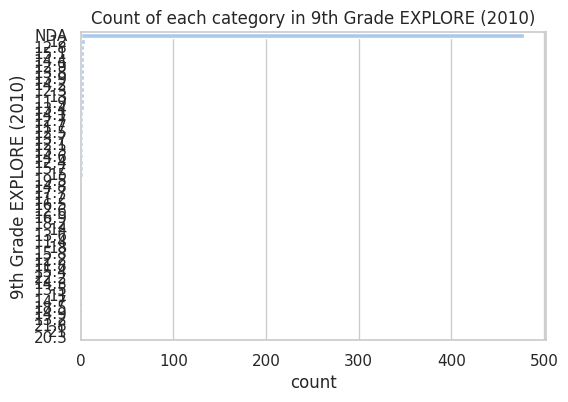

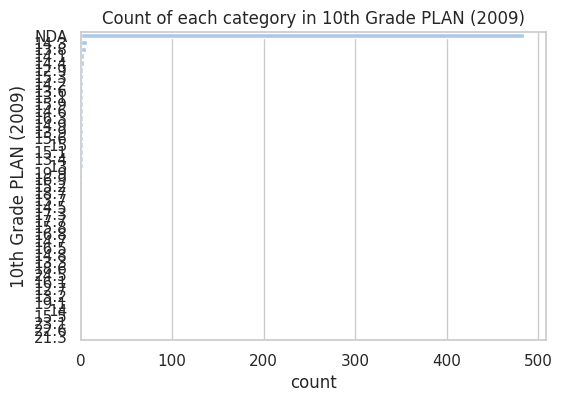

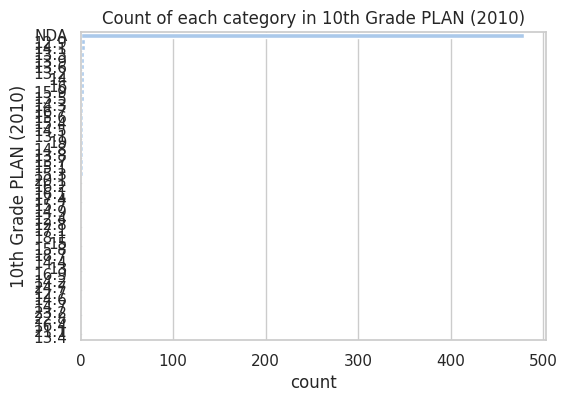

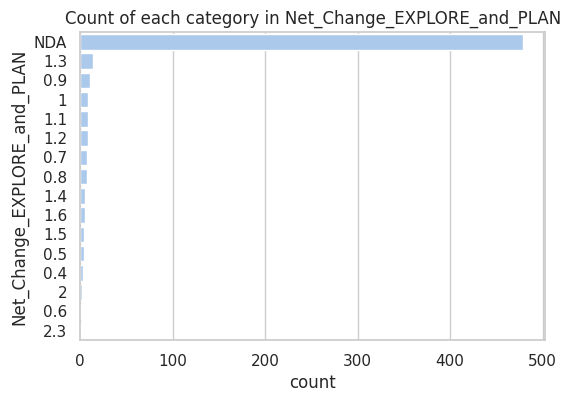

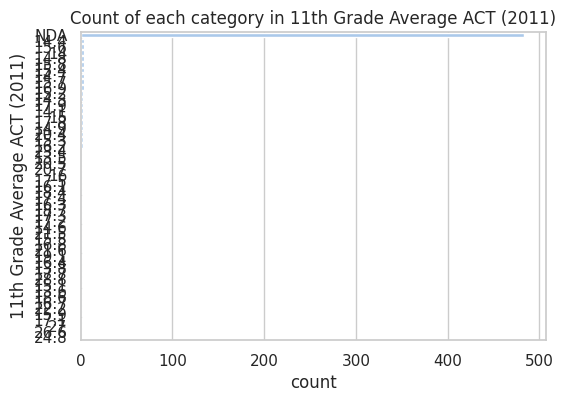

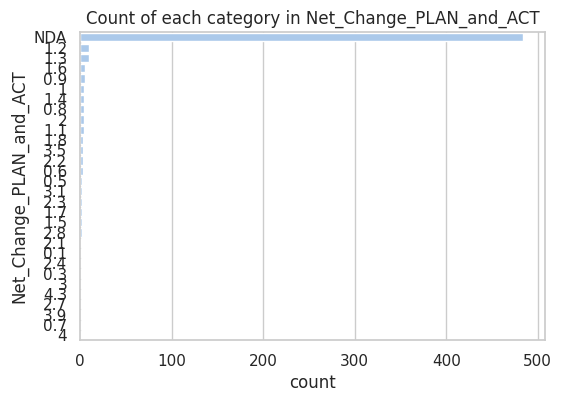

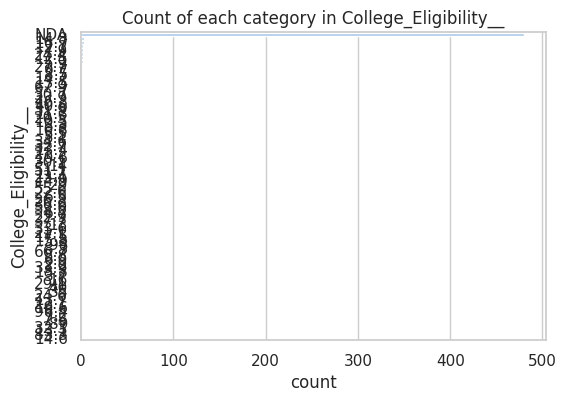

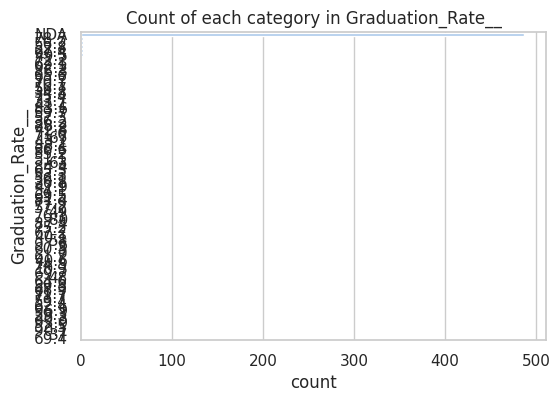

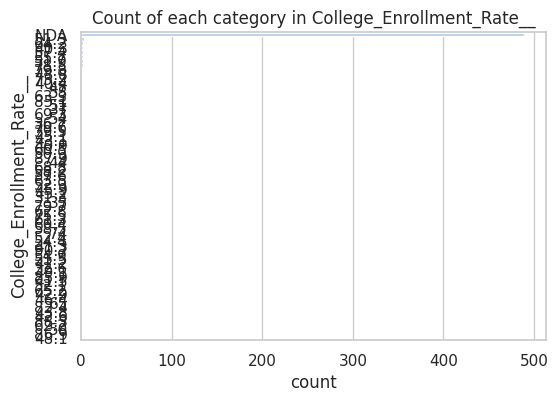

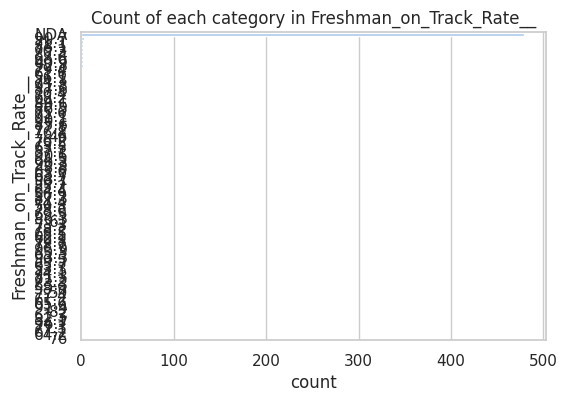

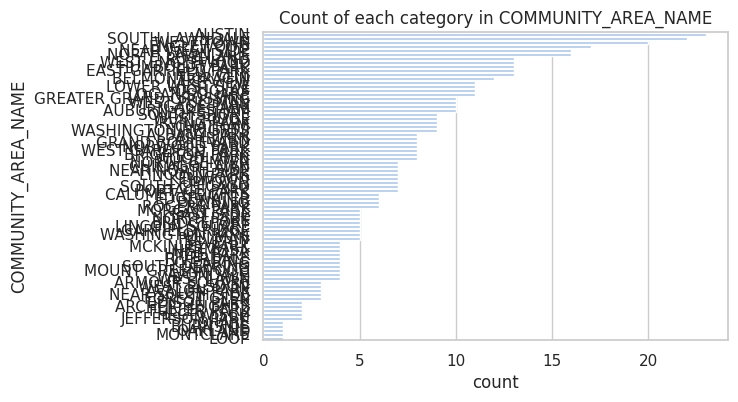

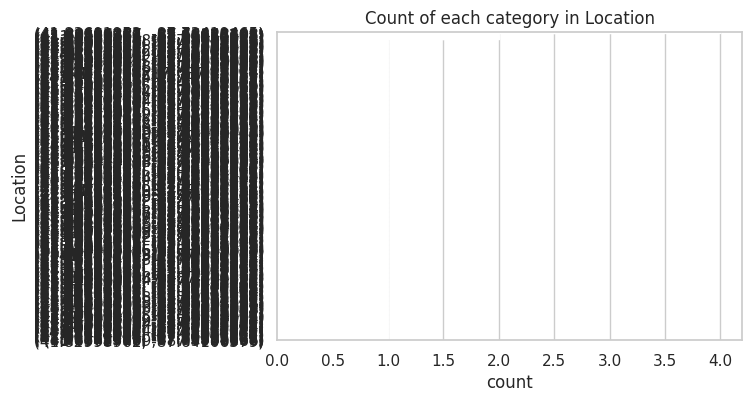

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of each category in {col}")
    plt.show()


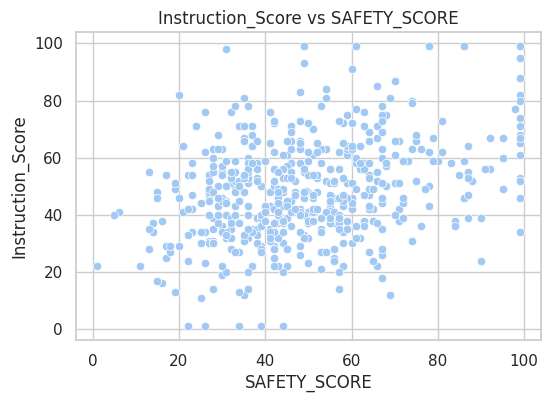

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='SAFETY_SCORE', y='Instruction_Score', data=df)
plt.title("Instruction_Score vs SAFETY_SCORE")
plt.show()


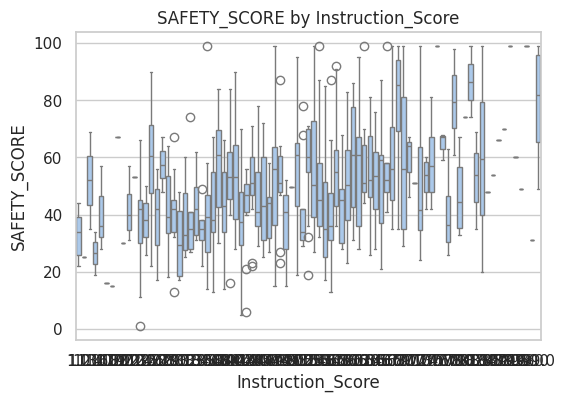

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Instruction_Score', y='SAFETY_SCORE', data=df)
plt.title("SAFETY_SCORE by Instruction_Score")
plt.show()


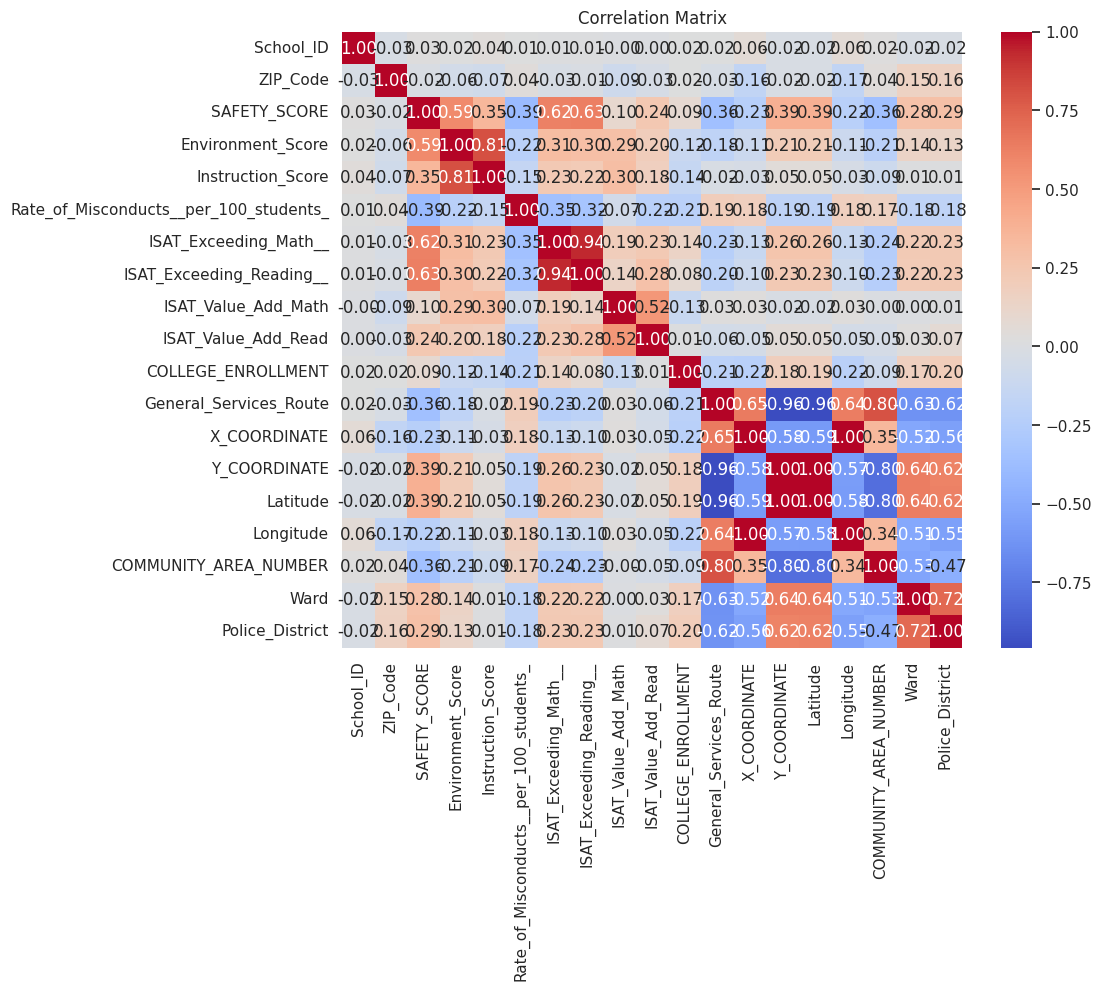

In [36]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [37]:
# أعلى مدارس من حيث Safety Score
df[['NAME_OF_SCHOOL','SAFETY_SCORE']].sort_values(by='SAFETY_SCORE', ascending=False).head(10)

# أقل مدارس من حيث Safety Score
df[['NAME_OF_SCHOOL','SAFETY_SCORE']].sort_values(by='SAFETY_SCORE', ascending=True).head(10)

# متوسط Safety Score لكل نوع مدرسة
df.groupby('Elementary, Middle, or High School')['SAFETY_SCORE'].mean().sort_values(ascending=False)


Elementary, Middle, or High School
HS    49.613322
ES    49.518873
MS    48.000000
Name: SAFETY_SCORE, dtype: float64

In [38]:
df[['NAME_OF_SCHOOL','SAFETY_SCORE']].sort_values(by='SAFETY_SCORE', ascending=True).head(10)


NAME_OF_SCHOOL  SAFETY_SCORE
121          Edmond Burke Elementary School           1.0
346          Luke O'Toole Elementary School           5.0
199       George W Tilton Elementary School           6.0
161           Foster Park Elementary School          11.0
562      William W Carter Elementary School          13.0
276            John Fiske Elementary School          13.0
142  Emil G Hirsch Metropolitan High School          13.0
93         Countee Cullen Elementary School          14.0
180                   Gage Park High School          14.0
37    Asa Philip Randolph Elementary School          15.0

In [39]:
df[['NAME_OF_SCHOOL','SAFETY_SCORE']].sort_values(by='SAFETY_SCORE', ascending=False).head(10)


NAME_OF_SCHOOL  SAFETY_SCORE
27       Annie Keller Elementary Gifted Magnet School          99.0
0                   Abraham Lincoln Elementary School          99.0
39                Augustus H Burley Elementary School          99.0
366  Mary E Courtenay Elementary Language Arts Center          99.0
417                     Oriole Park Elementary School          99.0
532                        Wildwood Elementary School          99.0
410             Northside Learning Center High School          99.0
412                    Norwood Park Elementary School          99.0
408         Northside College Preparatory High School          99.0
245                  James G Blaine Elementary School          99.0

In [40]:
df['Elementary, Middle, or High School'].value_counts(normalize=True) * 100


Elementary, Middle, or High School
ES    81.625442
HS    16.431095
MS     1.943463
Name: proportion, dtype: float64

In [41]:
df.groupby('Elementary, Middle, or High School')['SAFETY_SCORE'].mean()


Elementary, Middle, or High School
ES    49.518873
HS    49.613322
MS    48.000000
Name: SAFETY_SCORE, dtype: float64

In [42]:
df[['Environment_Score','SAFETY_SCORE']].corr()


Environment_Score  SAFETY_SCORE
Environment_Score           1.000000      0.585865
SAFETY_SCORE                0.585865      1.000000

In [43]:
# 1️⃣ استبدل كل قيم NDA بـ NaN حقيقية يفهمها الباندا
import numpy as np
df['Leaders_Score'] = df['Leaders_Score'].replace('NDA', np.nan)

# 2️⃣ حوّل العمود إلى float
df['Leaders_Score'] = df['Leaders_Score'].astype(float)


In [44]:
df['Leaders_Score'].isnull().sum()


np.int64(271)

In [45]:
import numpy as np
import pandas as pd

# استبدال القيم 'NDA' بقيمة NaN
df['Leaders_Score'] = df['Leaders_Score'].replace('NDA', np.nan)

# استخدام to_numeric لتحويل القيم إلى أرقام بأمان
df['Leaders_Score'] = pd.to_numeric(df['Leaders_Score'], errors='coerce')


In [46]:
df['Leaders_Score'].info()
df['Leaders_Score'].isnull().sum()
df['Leaders_Score'].head()


<class 'pandas.core.series.Series'>
RangeIndex: 566 entries, 0 to 565
Series name: Leaders_Score
Non-Null Count  Dtype  
--------------  -----  
295 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


0    65.0
1    63.0
2     NaN
3    65.0
4    45.0
Name: Leaders_Score, dtype: float64

In [47]:
import numpy as np
import pandas as pd

# 1️⃣ استبدل كل القيم "NDA" في الجدول بالكامل بـ NaN
df = df.replace('NDA', np.nan)

# 2️⃣ حوّل كل الأعمدة الرقمية اللي ممكن تتحول لأرقام
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


/tmp/ipython-input-505299741.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [48]:
df.info()  # تشوف أنواع البيانات بعد التحويل
df.isnull().sum()  # تعرف عدد القيم المفقودة في كل عمود


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              566 non-null    object 
 9   Network_Manager      

School_ID                             0
NAME_OF_SCHOOL                        0
Elementary, Middle, or High School    0
Street_Address                        0
City                                  0
                                     ..
COMMUNITY_AREA_NUMBER                 0
COMMUNITY_AREA_NAME                   0
Ward                                  0
Police_District                       0
Location                              0
Length: 78, dtype: int64

In [49]:
import numpy as np
import pandas as pd

# 1️⃣ استبدال كل "NDA" في الجدول بـ NaN
df = df.replace('NDA', np.nan)

# 2️⃣ محاولة تحويل الأعمدة الرقمية فقط إلى float
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        # لو العمود فيه نصوص أو قيم غير رقمية، سيبه زي ما هو
        pass


In [50]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              566 non-null    object 
 9   Network_Manager      

School_ID                             0
NAME_OF_SCHOOL                        0
Elementary, Middle, or High School    0
Street_Address                        0
City                                  0
                                     ..
COMMUNITY_AREA_NUMBER                 0
COMMUNITY_AREA_NAME                   0
Ward                                  0
Police_District                       0
Location                              0
Length: 78, dtype: int64

In [51]:
df.dtypes

School_ID                              int64
NAME_OF_SCHOOL                        object
Elementary, Middle, or High School    object
Street_Address                        object
City                                  object
                                       ...  
COMMUNITY_AREA_NUMBER                  int64
COMMUNITY_AREA_NAME                   object
Ward                                   int64
Police_District                        int64
Location                              object
Length: 78, dtype: object

In [58]:
# حفظ البيانات بعد التنظيف والتحليل لحد دلوقتي
with pd.ExcelWriter('analysis_progress.xlsx') as writer:
    df_filtered.to_excel(writer, sheet_name='Schools_Cleaned', index=False)
